In [2]:
import numpy as np
import tangos as db
import pickle as pck
import pynbody
import matplotlib.pyplot as plt
import scipy.integrate as integ
import math as ma
plt.ion()

plt.rcParams['figure.figsize'] = (12, 9) 
plt.rcParams['font.size'] = 20  
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['xtick.major.size'] = 10 
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

sim = db.get_simulation('h1.cosmo50')

In [ ]:
6.196516010055769, -1.0085470085470085
6.306957862430051, -1.623931623931624
6.550481367511049, -1.4529914529914532
6.413770282961059, -1.0854700854700856
6.5273988144148545, -0.9230769230769229
6.623456093085699, -1.0085470085470085
6.6519004697773365, -0.9401709401709399
6.675746838633057, -1.367521367521367
6.7846110587675525, -1.1367521367521367
6.820355563619487, -1.017094017094017
6.8664588931801145, -0.7606837606837606
6.955808867934401, -0.4017094017094016
6.762724423414982, 0.02564102564102555
7.02299492112329, -1.0598290598290596
6.981224042789781, -0.683760683760684
6.958141058487711, -2.6923076923076925
7.237440405212404, -1.4102564102564101
7.142972414776699, -1.2136752136752134
7.118750800192833, -0.4017094017094016
7.263444546357708, -0.8205128205128203
7.317417874788983, -1.1538461538461537
7.338816994694139, -0.974358974358974
7.452772762210286, -1.367521367521367
7.657173238902825, -1.1111111111111112
7.853464822776638, -1.5470085470085473
7.868482503018319, -0.5042735042735038


In [ ]:
4.438690290782157, -1.655394810056149
4.799002565983596, -1.458343871718347
4.8528099978163866, -1.015099398047448
4.999264357433208, -1.0909757701451772
4.999264357433208, -1.3834286003338567
5.295715934885692, -1.167231524103395
5.246738588658755, -1.025595629520967
5.266274935294701, -0.9218726288633725
5.355092622073142, -0.9598361070362693
5.475850692837808, -0.997875461581264
5.620181110106127, -1.0548333249026256
5.588936279039202, -1.2057008447569428
5.725597573909202, -1.3947088876523854
5.496240143437311, -1.4224543477161218
5.920354835399216, -1.5838433911679912
5.81135261106351, -1.1590621680408724
6.020203823127447, -0.9897313976427746
6.201889299392867, -1.1222115433254092
6.110371320207809, -0.8578582629369218
5.942399406958806, -0.697101522585867
5.7362473637433276, -0.7815266326066066
6.400941761045395, -0.3962264150943402
6.47271047396804, 0.03758409631240767
7.129397500523683, -0.5014669431938903

In [4]:
def BHMstar(logMstar):
    '''
    BH mass given a stellar mass
    based on analysis by Haring and Rix 2004 and Schramm + Silverman 2013
    '''
    c = 8.31
    a = 1.12
    b = 11.
    predlogMBH = c + a * (logMstar-b)
    return predlogMBH


def BHMBulge(logMbulge):
    '''
    BH mass given a bulge mass
    based on analysis by Haring and Rix 2004 and Kormendy and Ho 2013
    '''
    c = 8.69
    a = 1.16
    b = 11.
    predlogMBH = c + a * (logMbulge-b)
    return predlogMBH

In [5]:
def new_mass_int(a,b,r_min=0.35,r_max=0.7):
    
    m1 = ((4*np.pi*a)/(3-b))*((r_max**(3-b))-(r_min**(3-b)))
    m2 = ((a*(r_min)**(-b))*((4/3)*np.pi*(0.35)**3))
    # print(m1)
    # print(m2)
    m = m1+m2
    
    return m

In [6]:
step = sim.timesteps[-1]
mstar = step.calculate_all('Mstar')
Mstar = np.array(mstar)
ok = np.where(Mstar>0)
logMstar = np.log10(Mstar[ok])

print(mstar)
print(logMstar)
print(len(Mstar[0]))
print(len(Mstar[ok]))
logmBH = []

for i in range(len(Mstar[ok])):
    logmbh = BHMstar(logMstar[i])
    logmBH.append(logmbh)
logMBH = np.array(logmBH)

print(logMBH)

#plt.plot(logMstar,logMBH)
#plt.scatter(logMBH,logMstar)

[array([3.83701369e+12, 4.99869851e+11, 1.28152271e+11, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])]
[12.58399335 11.69885694 11.10772631 ...  5.19666181  5.19640813
  4.89538138]
4240
2607
[10.08407255  9.09271978  8.43065346 ...  1.81026122  1.80997711
  1.47282715]


In [7]:
f = open('Outside_halo.pkl','rb')
data = pck.load(f)
f.close()


In [8]:
f = open('ErrorIDS.pkl','rb')
my_saved_data = pck.load(f)
f.close()
ids=my_saved_data['bad_ids']

halo = db.get_halo('h1.cosmo50/%4096/1')
all_bhs_h1 = halo['BH_central']
all_ids = []

error_indices = []

for i in range(2193):
    
    all_ids.append(all_bhs_h1[i].halo_number)
    
for i in range(2193):
    if all_ids[i] in ids:
        error_indices.append(i)
        
h1_ids = np.arange(0,2193,1) 

new_ids = np.delete(h1_ids,error_indices)
print(len(new_ids))


KeyError: 'bad_ids'

In [ ]:
gal_mass = np.array(data['gal_mass'])
bh_mass = np.array(data['bh_mass'])
sim_mass = np.array(data['sim_mass'])
time = np.array(data['time'])
dist = np.array(data['cluster_dist'])

In [25]:
f = open('Extrapolation_Outputs.pkl','rb')
data = pck.load(f)
f.close()

a = np.array(data['a'])
b = np.array(data['b'])

#bad_mass=[]
mass=[]

#bad = np.where(b>2.999)
#good = np.where(b<=2.999)

for i in range(len(b)):
    m = new_mass_int(a[i],b[i],r_min=0.35)
    mass.append(m)

data_to_file = {'mass':mass}
f = open('UCD_proxy.pkl','wb')
pck.dump(data_to_file,f)
f.close()

In [9]:
Mbh = []
mstar = np.log10(gal_mass[ok])
for i in range(len(mstar)):
    mbh = BHMstar(mstar[i])
    Mbh.append(mbh)


NameError: name 'gal_mass' is not defined

In [10]:
Mbh_bulge = []
mbulge = np.log10(mass)
#print(mass)
#print(mbulge)
for i in range(len(mass)):
    mbh = BHMBulge(mbulge[i])
    Mbh_bulge.append(mbh)
    
#plt.plot(mbulge,Mbh_bulge)

NameError: name 'mass' is not defined

In [26]:
ok = np.where(b<=2.999)
plt.scatter(np.log10(mass),np.log10(bh_mass),label = 'Extrapolated UCD proxy',c='mediumvioletred',marker='p')
#ok_line = np.where(logMBH>2)
#plt.plot(mbulge,Mbh_bulge,label='Pred. Kormendy and Ho 2013',c='darkblue',lw=3)
#plt.scatter(np.log10(gal_mass[ok]),np.log10(bh_mass[ok]),label='Host Galaxy')

plt.ylabel('Log10 SMBH Mass [M$_{\odot}$]')
plt.xlabel('Log10 Mstar [M$_{\odot}$]')
plt.legend(loc='lower right')
plt.savefig('bhmass_mstar_prediction.png')

NameError: name 'bh_mass' is not defined

In [12]:
plt.scatter(time[ok],gal_mass[ok],c = np.log10(mass),cmap = 'plasma',marker='p')
plt.yscale('log')
plt.colorbar(label='Log10 Extrapolated Mass within 0.7kpc [M$_{\odot}$] \n (UCD proxy mass)')
plt.xlabel('Time nearest infall [Gyr]')
plt.ylabel('Log10 Original Host Mstar [M$_{\odot}$]')
plt.savefig('hostmstar_time_ucdproxy.png')

NameError: name 'time' is not defined

In [13]:
plt.scatter(dist[ok],time[ok],c=np.log10(gal_mass[ok]),cmap='plasma',vmax=9.5,vmin=6.5,marker='p')
plt.colorbar(label='Log10 Host Galaxy Mstar [M$_{\odot}$]')
plt.xlabel('Distance from the centre of the cluster at z=0 [kpc]')
plt.ylabel('Time nearest infall [Gyr]')
plt.savefig('time_dist_hostmstar.png')

NameError: name 'dist' is not defined

In [14]:
plt.scatter(dist[ok],time[ok],c=np.log10(mass),cmap='plasma',vmax=9.5,vmin=6.5,marker='p')
plt.colorbar(label='Log10 Extrapolated Mass within 0.7kpc [M$_{\odot}$] \n (UCD proxy mass)')
plt.xlabel('Distance from the centre of the cluster at z=0 [kpc]')
plt.ylabel('Time nearest infall [Gyr]')
plt.savefig('time_dist_ucdproxy.png')

NameError: name 'dist' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_1116730/3287462036.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('plasma')


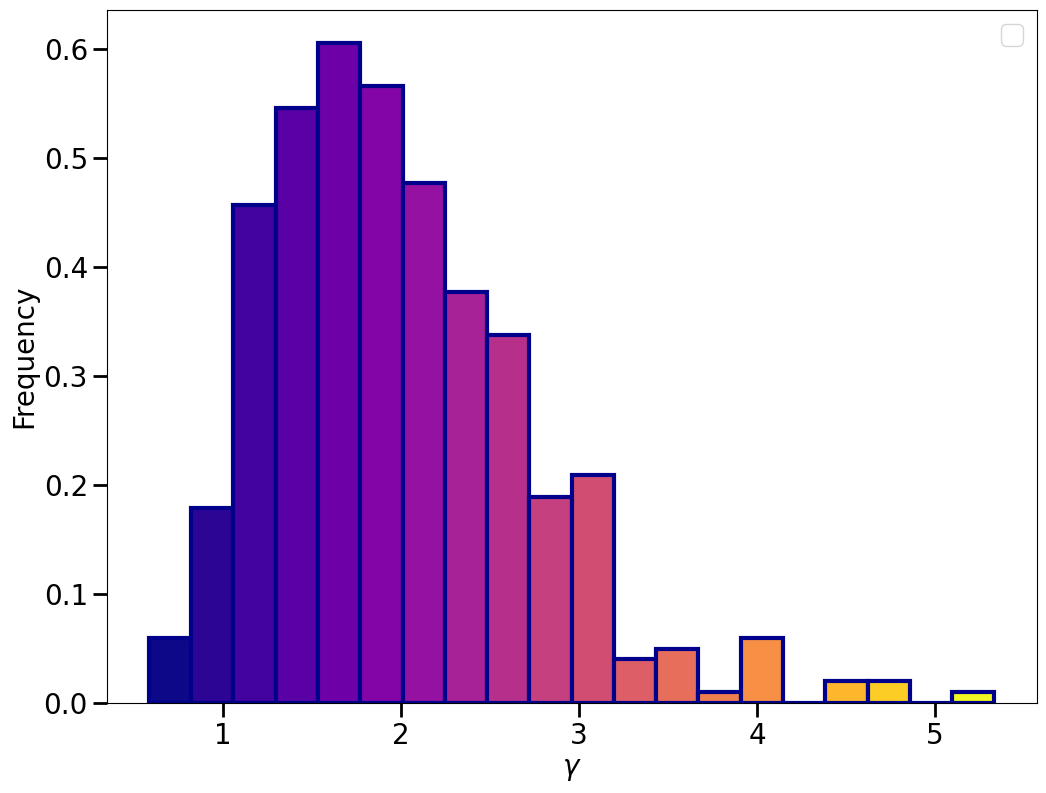

In [27]:
n, bins, patches = plt.hist(b,histtype='bar',lw=3,density=True,bins=20,color='mediumvioletred',ec='darkblue')
#type(my_saved_data4['Gamma'])
#plt.title('Distribution of Gamma using radius (0.7-1.75)kpc')
plt.ylabel('Frequency')
plt.xlabel('$\gamma$')
plt.legend(loc='upper right')
cm = plt.cm.get_cmap('plasma')

bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.savefig('gamma_distibution.png')

In [23]:
plt.scatter(dist[ok],mass,c=np.log10(gal_mass[ok]),cmap='plasma',marker='p')
plt.yscale('log')
plt.colorbar(label='Log10 Origianl Host Galaxy Mstar [M$_{\odot}$]')
plt.xlabel('Distance from the centre of the cluster at z=0 [kpc]')
plt.ylabel('Log10 Extrapolated Mstar within 0.7kpc [M$_{\odot}$] \n (UCD proxy mass)')
plt.savefig('dist_ucdproxy_hostmass.png')

NameError: name 'dist' is not defined

In [17]:
plt.scatter(dist[ok],mass,c=np.log10(bh_mass[ok]),cmap='plasma',vmax =7,marker='p')
plt.yscale('log')
plt.colorbar(label='Log10 BH Mass [M$_{\odot}$]')
plt.xlabel('Distance from the centre of the cluster at z=0 [kpc]')
plt.ylabel('Log10 Extrapolated Mstar within 0.7kpc [M$_{\odot}$]')
plt.savefig('ucdproxy_dist_bhmass.png')

NameError: name 'dist' is not defined

In [21]:
mass1=np.where(np.log10(gal_mass[ok])<=8)
mass2=np.where((np.log10(gal_mass[ok])>8) & (np.log10(gal_mass[ok])<=9))
mass3=np.where(np.log10(gal_mass[ok])>9)
plt.hist(dist[mass1],histtype='step',lw=3,density=True,bins=20,color='darkblue',label= 'Host Mass < 10$^8$')
plt.hist(dist[mass2],histtype='step',lw=3,density=True,bins=20,color='mediumvioletred',label='Host Mass > 10$^8$ & <= 10$^9$')
plt.hist(dist[mass3],histtype='step',lw=3,density=True,bins=20,color='orange',label='Host Mass > 10$^9$')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Distance from the centre of the cluster at z=0 [kpc]')
plt.savefig('dist_distibution_Mstar.png')

NameError: name 'gal_mass' is not defined

In [22]:
plt.scatter(dist[ok],mass,c=np.log10(gal_mass[ok]),cmap='plasma',marker='p')
plt.yscale('log')
plt.colorbar(label='Log10 Origianl Host Galaxy Mstar [M$_{\odot}$]')
plt.xlabel('Distance from the centre of the cluster at z=0 [kpc]')
plt.ylabel('Log10 Extrapolated Mstar within 0.7kpc [M$_{\odot}$] \n (UCD proxy mass)')
plt.savefig('dist_ucdproxy_hostmass.png')

NameError: name 'dist' is not defined